# Heart attack analysis & prediction

find the patients with higher and lower chances of heart attack using various features.

0 = less chance of heart attack

1 = more chance of heart attack

In [14]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report

seed=42

In [2]:
#reading dataset
data = pd.read_csv('dataset/heart.csv')
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
y = data['output']
x = data.drop('output', axis=1)

In [4]:
#normalizing the data
x_scaled = StandardScaler().fit_transform(x)

# splitting the data into train, test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [5]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 133, 0: 109})

# Classifier (Max voting) model

In [6]:
#model building
rf_model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=seed)
knn_model = KNeighborsClassifier(n_neighbors=10)
lr_model = LogisticRegression(random_state=seed,max_iter=1000)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
svc_model = SVC(kernel='rbf', C=2)
nb_model = GaussianNB()
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,
            colsample_bytree=0.6,seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

#Voting classifier
final_model = VotingClassifier(
                estimators=[("rf",rf_model), ("knn",knn_model), ("lr",lr_model), ("dt",dt_model), ("svc",svc_model), 
                                             ("nb",nb_model), ("xgb",xgb_model)],
                voting='hard'
                  )

#training
final_model.fit(x_train, y_train)


#predictions
y_pred = final_model.predict(x_test)

#evaluation
accuracy = round(accuracy_score(y_pred, y_test)*100, 3)
roc = round(roc_auc_score(y_pred, y_test),3)

print(f'Ensembler Classifier Model Accuracy : {accuracy}%')
print(f'Ensemble Model AUC score: {roc}')

Ensembler Classifier Model Accuracy : 91.803%
Ensemble Model AUC score: 0.919


In [8]:
# Ensemble Classifier Model Confusion matrix
ensemble_conf_matrix = confusion_matrix(y_pred, y_test)
print(ensemble_conf_matrix)

[[26  2]
 [ 3 30]]


In [9]:
#Ensemble Classifier Model classification report
ens_classification_report = classification_report(y_test, y_pred)
print(ens_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [10]:

#training
rf_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
nb_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

#predictions(individual)
rf_pred = rf_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
lr_pred = lr_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
svc_pred = svc_model.predict(x_test)
nb_pred = nb_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)

rf_accuracy = round(accuracy_score(rf_pred ,y_test)*100,2)
print(f'Random Forest Model Accuracy:{rf_accuracy}%')

knn_accuracy = round(accuracy_score(knn_pred ,y_test)*100,2)
print(f'K Nearest Neighbors Model Accuracy:{knn_accuracy}%')

lr_accuracy = round(accuracy_score(lr_pred ,y_test)*100,2)
print(f'Logistic Regression Model Accuracy:{lr_accuracy}%')

dt_accuracy = round(accuracy_score(dt_pred ,y_test)*100,2)
print(f'Decision Tree Classifier Model Accuracy:{dt_accuracy}%')

svc_accuracy = round(accuracy_score(svc_pred ,y_test)*100,2)
print(f'Support Vector Classifier Model Accuracy:{svc_accuracy}%')

nb_accuracy = round(accuracy_score(nb_pred ,y_test)*100,2)
print(f'Naive Bayes Classifier Model Accuracy:{nb_accuracy}%')

xgb_accuracy = round(accuracy_score(xgb_pred ,y_test)*100,2)
print(f'Extreme Gradient Boost Classifier Model Accuracy:{xgb_accuracy}%')

Random Forest Model Accuracy:88.52%
K Nearest Neighbors Model Accuracy:70.49%
Logistic Regression Model Accuracy:86.89%
Decision Tree Classifier Model Accuracy:81.97%
Support Vector Classifier Model Accuracy:70.49%
Naive Bayes Classifier Model Accuracy:86.89%
Extreme Gradient Boost Classifier Model Accuracy:85.25%


In [34]:
#Random Forest Classifier Model Confusion Matrix
rf_conf_matrix = confusion_matrix(rf_pred, y_test)
rf_conf_matrix

array([[25,  3],
       [ 4, 29]])

In [35]:
#Random Forest Model 
rf_classification_report = classification_report(rf_pred, y_test)
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



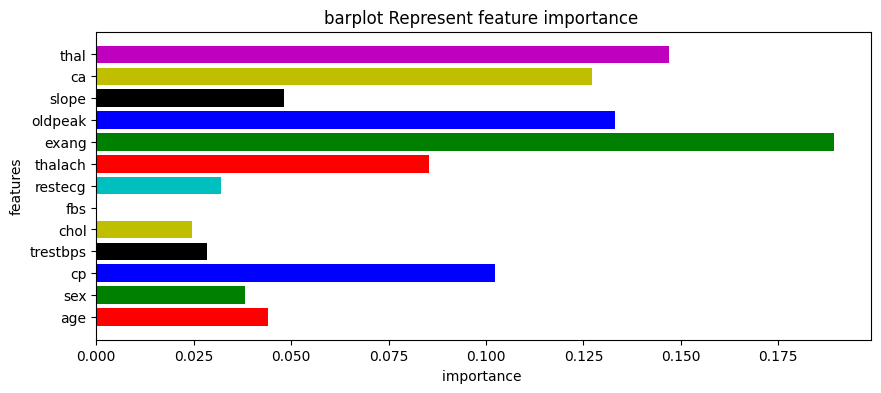

In [16]:
#Finding important features which causing heart attack

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb_model.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = my_colors)
plt.show()

# Conclusion

datset ref: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

1. Ensemble technique increase the accuracy of the model.

2. Random Forest Classifier model gave the best accuracy compared with other models.

3. Features(EXANG, THAL, OLDPEAK, CP) are major symotoms/factors for heart attack.